# ANN in PyTorch

### This jupyter notebook is based on ANN and its workflow in pytorch

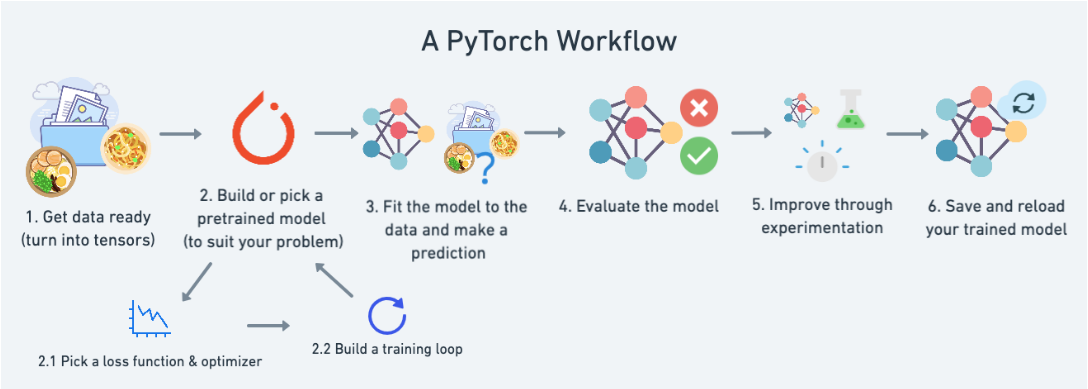

## Implementing a Linear Regression

We will start by implementing linear regression using tensors and autograd directly,
then we will simplify the code using PyTorch’s high-level API

In [2]:
# import necrssary libraries and tools
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn  # nn contain all the building blocks of the neural network

In [3]:
from sklearn.datasets import _california_housing, fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target,random_state=42)
x_train,x_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

now lets convert the data into tensor using tensor operations

In [5]:
x_train = torch.FloatTensor(x_train)
x_valid = torch.FloatTensor(x_valid)
X_test = torch.FloatTensor(X_test)
means = x_train.mean(dim=0,keepdim=True)
stds = x_train.std(dim=0,keepdim=True)
x_train = (x_train - means) / stds
x_valid = (x_valid - means) / stds
X_test = (X_test - means) / stds

Let’s also convert the targets to tensors. Since our predictions will be column vectors
(i.e., matrices with a single column), we need to ensure that our targets are also
column vectors.

In [6]:
y_train = torch.FloatTensor(y_train).reshape(-1,1)
y_valid = torch.FloatTensor(y_valid).reshape(-1,1)
y_test = torch.FloatTensor(y_test).reshape(-1,1)

now the data is ready , lets create the parameter of our linear regression

In [7]:
torch.manual_seed(42)
n_features = x_train.shape[1]  # there are 8 input features
w = torch.randn((n_features,1),requires_grad=True)
b = torch.tensor(0.,requires_grad=True)